<a href="https://colab.research.google.com/github/MCPMAlf/An-lisis-de-Datos/blob/main/Proyecto4_Ejercicio2_Propuesta2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
#Importa paquetes necesarios
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.losses import CategoricalCrossentropy, MSE,MAE

In [82]:
#Lectura de datos
Datos = pd.read_csv('/content/creditcard.csv')

#Vizualizacion de los datos
Datos.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [83]:
Prueba = Datos.copy()

Max_col = Datos.max()
Min_col = Datos.min()


In [84]:
#Estandariza datos para que tengan valores entre -1 y 1
"""
for i in range(1,len(Prueba.columns)-1):
  if(np.abs(Max_col[i]) > np.abs(Min_col[i]) ):
    Prueba.iloc[:, i] = Prueba.iloc[:, i] / np.abs(Max_col[i])
  else:
    Prueba.iloc[:, i] = Prueba.iloc[:, i] / np.abs(Min_col[i])
"""

'\nfor i in range(1,len(Prueba.columns)-1):\n  if(np.abs(Max_col[i]) > np.abs(Min_col[i]) ):\n    Prueba.iloc[:, i] = Prueba.iloc[:, i] / np.abs(Max_col[i])\n  else:\n    Prueba.iloc[:, i] = Prueba.iloc[:, i] / np.abs(Min_col[i])\n'

In [85]:
#Visualización de datos estandarizados y no estandarizados.
"""
Max_col_prueba = Prueba.max()
Min_col_prueba = Prueba.min()

print(Max_col_prueba)
print(Min_col_prueba)
print(Max_col)
print(Min_col)
"""

'\nMax_col_prueba = Prueba.max()\nMin_col_prueba = Prueba.min()\n\nprint(Max_col_prueba)\nprint(Min_col_prueba)\nprint(Max_col)\nprint(Min_col)\n'

In [103]:
Datos_Analisis = Prueba.copy()

In [104]:
Datos_Analisis = Datos_Analisis.drop(['Time'], axis = 1)
Datos_Analisis.drop([251529], axis = 0, inplace = True)
Datos_Analisis

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251524,-0.282031,0.336594,0.939456,-1.009205,0.844196,0.857354,0.114523,0.281519,0.055788,-0.626688,...,0.266359,0.861627,-0.248420,-0.264373,-0.456752,0.500915,0.150034,0.177073,11.50,0.0
251525,-0.747520,1.527817,-1.041537,-0.284525,0.278937,-0.207860,-0.780236,-2.146115,-0.402847,-1.866892,...,-1.149728,0.748130,-0.005463,-0.454463,-0.228082,0.552758,-0.136165,0.023129,1.00,0.0
251526,2.018155,0.078217,-1.613722,0.350389,0.340054,-0.674645,0.055148,-0.074942,0.292296,-0.195943,...,-0.305854,-0.836125,0.355946,0.656998,-0.329132,0.144121,-0.069370,-0.039697,1.98,0.0
251527,2.141543,-0.643542,-1.551417,-0.541024,-0.227185,-0.782443,-0.110821,-0.277358,-0.876108,1.064115,...,-0.461418,-0.780095,0.198362,-0.408668,-0.149191,0.522654,-0.078874,-0.077166,24.90,0.0


In [105]:
import math 
Longitud_Datos_Train = math.floor(len(Datos_Analisis)*.73)
Longitud_Datos_Test = len(Datos_Analisis) - Longitud_Datos_Train

print(Longitud_Datos_Test, Longitud_Datos_Train)

67913 183616


In [106]:
#Creación de muestra aleatoria para datos de entrenamiento y prueba.
#Entrena la red para reconocer los movimientos considerados no fraudulentos.
Datos_Train = Datos_Analisis[Datos_Analisis.Class == 0].sample(Longitud_Datos_Train)
Datos_Test = Datos_Analisis.drop(Datos_Train.index)

#print(len(Datos_Train))
#print(len(Datos_Test))

In [107]:
Datos_Train = Datos_Train.reset_index().drop(["index"], axis = 1)
Datos_Test = Datos_Test.reset_index().drop(["index"], axis = 1)

In [108]:
Datos_Train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.200794,0.830104,1.259606,1.338062,0.160884,-0.150416,0.203018,0.056720,-0.706854,0.385465,...,0.081520,0.214768,-0.147937,-0.000004,-0.327387,-0.268922,0.006097,0.059504,2.99,0.0
1,-1.527505,0.244651,1.337735,-0.312521,0.842058,0.092480,0.657621,0.153561,0.458581,-0.665438,...,-0.429838,-1.195722,0.031561,-0.574646,-0.072449,-1.314999,-0.347709,0.391020,38.47,0.0
2,2.209316,-0.500057,-1.576015,-0.306806,-0.343861,-1.384334,0.085565,-0.488657,-0.661078,0.903663,...,-0.402300,-0.466305,0.167597,0.071701,0.044474,0.674155,-0.078706,-0.074028,2.79,0.0
3,1.121491,-0.946323,0.437724,-0.748922,-1.111741,-0.403156,-0.582528,-0.042594,-0.979918,0.706488,...,0.104703,-0.131058,-0.074003,-0.003195,0.217446,-0.422956,-0.009860,0.034590,142.46,0.0
4,-0.375310,0.855962,0.257790,-1.024656,1.393427,-0.665750,1.303149,-0.198846,-0.172826,-1.181478,...,-0.232507,-0.583840,-0.091899,0.602032,-0.284461,-0.805115,-0.038150,-0.037375,9.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183611,1.159111,0.148971,0.478608,0.583319,-0.463595,-0.812835,0.080882,-0.117667,-0.294946,0.093152,...,-0.119521,-0.415865,0.067365,0.550222,0.260414,0.139696,-0.041851,0.012162,28.24,0.0
183612,1.157932,0.228689,0.147094,0.642261,-0.337069,-1.405980,0.546524,-0.396187,-0.318784,-0.100567,...,-0.322359,-1.054388,0.132508,0.733135,0.245977,0.109821,-0.069201,0.023621,59.95,0.0
183613,1.283310,0.179947,0.770151,0.129637,-0.596616,-0.944698,-0.206327,-0.323442,1.475156,-0.624009,...,-0.267660,-0.449612,0.091024,0.424299,0.139426,0.860996,-0.089027,0.006314,4.28,0.0
183614,-1.079366,0.791300,0.834926,-0.569829,0.397944,-1.297978,0.727071,0.013294,-0.627121,-0.602830,...,0.309598,0.853835,-0.669333,0.598518,0.994085,-0.063945,-0.439281,-0.473793,1.00,0.0


In [109]:
y_Datos_test = Datos_Test["Class"]

Indices_Fraude = y_Datos_test[y_Datos_test == 1].index

In [110]:
y_Datos_train = Datos_Train["Class"].to_numpy()
y_Datos_test = Datos_Test["Class"].to_numpy()

In [111]:
type(y_Datos_test)

numpy.ndarray

In [112]:
y_Datos_test

array([0., 0., 0., ..., 0., 0., 0.])

In [55]:
y_Datos_test[Indices_Fraude[0]]

1.0

In [113]:
#Elimina la columna "Class"
Datos_Train.drop(["Class"], axis = 1, inplace = True)
Datos_Test.drop(["Class"], axis = 1, inplace = True)

print(Datos_Train.columns)
print(Datos_Test.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


In [114]:
#Convierte el DataFrame en un np.ndarray
x_Valores_Train = Datos_Train.values
x_Valores_Test = Datos_Test.values

In [115]:
x_Valores_Train.shape

(183616, 29)

In [116]:
#Creación de categorías para los datos de salida
num_classes = 2
y_Datos_Train_Cat = keras.utils.to_categorical(y_Datos_train, num_classes)
y_Datos_Test_Cat = keras.utils.to_categorical(y_Datos_test, num_classes)

print(y_Datos_Test_Cat[Indices_Fraude[0]])
print(y_Datos_Test_Cat.shape)

[0. 1.]
(67913, 2)


In [169]:
#Parámetros
Learning_Rate = 0.01789
epochs = 50
batch_size = 50

In [170]:
#Modelo de red neuronal
model = Sequential()
model.add(Dense(20, activation='tanh', input_shape = (29,)))
model.add(Dropout(0.2))
model.add(Dense(15, activation='tanh'))
model.add(Dropout(0.1))
#model.add(Dense(8, activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(num_classes))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 20)                600       
                                                                 
 dropout_18 (Dropout)        (None, 20)                0         
                                                                 
 dense_39 (Dense)            (None, 15)                315       
                                                                 
 dropout_19 (Dropout)        (None, 15)                0         
                                                                 
 dense_40 (Dense)            (None, 5)                 80        
                                                                 
 dense_41 (Dense)            (None, 2)                 12        
                                                                 
Total params: 1,007
Trainable params: 1,007
Non-traina

In [171]:
#model.compile(loss=CategoricalCrossentropy(from_logits=False), optimizer = Adam (learning_rate=Learning_Rate),metrics=['accuracy'])
model.compile(loss=MAE, optimizer = Adam (learning_rate=Learning_Rate*1), metrics=['RootMeanSquaredError'])
#model.compile(loss='categorical_crossentropy', optimizer = SGD(learning_rate=Learning_Rate*1),metrics=['RootMeanSquaredError'])

In [172]:
history = model.fit(x_Valores_Train, y_Datos_Train_Cat,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data=(x_Valores_Test, y_Datos_Test_Cat)
                    )

Epoch 1/50
3673/3673 [==============================] - 11s 3ms/step - loss: 0.0114 - root_mean_squared_error: 0.0260 - val_loss: 0.0259 - val_root_mean_squared_error: 0.0864
Epoch 2/50
3673/3673 [==============================] - 10s 3ms/step - loss: 0.0112 - root_mean_squared_error: 0.0157 - val_loss: 0.0185 - val_root_mean_squared_error: 0.0844
Epoch 3/50
3673/3673 [==============================] - 9s 3ms/step - loss: 0.0081 - root_mean_squared_error: 0.0105 - val_loss: 0.0180 - val_root_mean_squared_error: 0.0822
Epoch 4/50
3673/3673 [==============================] - 9s 3ms/step - loss: 0.0080 - root_mean_squared_error: 0.0090 - val_loss: 0.0165 - val_root_mean_squared_error: 0.0821
Epoch 5/50
3673/3673 [==============================] - 10s 3ms/step - loss: 0.0101 - root_mean_squared_error: 0.0121 - val_loss: 0.0128 - val_root_mean_squared_error: 0.0825
Epoch 6/50
3673/3673 [==============================] - 9s 3ms/step - loss: 0.0116 - root_mean_squared_error: 0.0137 - val_loss

In [121]:
score = model.evaluate(x_Valores_Test, y_Datos_Test_Cat, verbose=1)
print(score)

2123/2123 [==============================] - 3s 1ms/step - loss: 0.0098 - root_mean_squared_error: 0.0826
[0.009818486869335175, 0.08263290673494339]


In [173]:
y_Valores_Prediccion = model.predict(x_Valores_Test)
print(y_Valores_Prediccion.shape)
print(y_Valores_Prediccion[Indices_Fraude[0]])
print("resultado correcto:")
print(y_Datos_Test_Cat[Indices_Fraude[0]])

2123/2123 [==============================] - 4s 2ms/step
(67913, 2)
[0.9619626  0.00525175]
resultado correcto:
[0. 1.]


In [166]:
from sklearn.metrics import precision_recall_curve, confusion_matrix
from sklearn import metrics

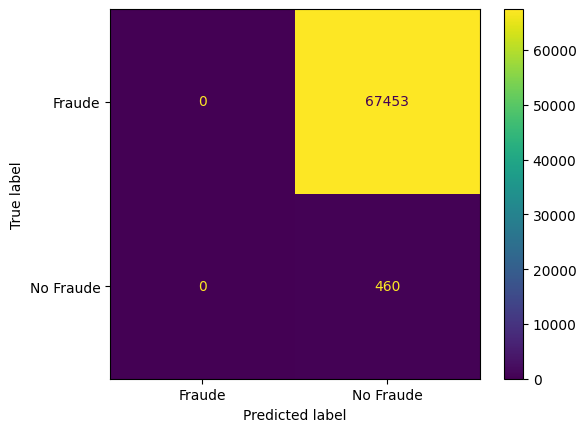

In [167]:
#Matriz 1:
y_Val_Pred_M1 = []

for i in range(0,y_Valores_Prediccion.shape[0]):
  if y_Valores_Prediccion[i][0] > y_Valores_Prediccion[i][0]:
    y_Val_Pred_M1.append(0)
  else:
    y_Val_Pred_M1.append(1)
    
y_Val_Pred = np.array(y_Val_Pred_M1)

Matriz1 = confusion_matrix(y_Datos_test, y_Val_Pred)

Matriz1_display = metrics.ConfusionMatrixDisplay(confusion_matrix = Matriz1, display_labels = ['Fraude', 'No Fraude'])
Matriz1_display.plot()
plt.show()


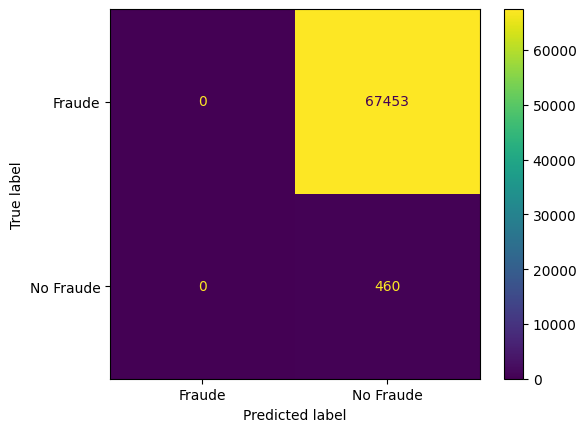

In [168]:
#Matriz 2:

Error_Cuadratico_M = np.mean(np.power(y_Datos_Test_Cat - y_Valores_Prediccion,2), axis = 1)

umbral_fijo = 0.75

y_Val_Pred_M2 = [1 if e > umbral_fijo else 0 for e in Error_Cuadratico_M]

Matriz2 = confusion_matrix(y_Datos_test, y_Val_Pred_M2)

Matriz2_display = metrics.ConfusionMatrixDisplay(confusion_matrix = Matriz1, display_labels = ['Fraude', 'No Fraude'])
Matriz2_display.plot()
plt.show()

In [ ]:
"""
y_Val_Pred = []

for i in range(0,y_Valores_Prediccion.shape[0]):
  if y_Valores_Prediccion[i][0] > y_Valores_Prediccion[i][0]:
    y_Val_Pred.append(y_Valores_Prediccion[i][0])
  else:
    y_Val_Pred.append(y_Valores_Prediccion[i][1])


for i in range(0,y_Valores_Prediccion.shape[0]):
  if y_Valores_Prediccion[i][0] > y_Valores_Prediccion[i][0]:
    y_Val_Pred.append(0)
  else:
    y_Val_Pred.append(1)

"""